# Optimal Sizing of Nuclear Reactor for Embedded Grid Systems

This notebook executes all Temoa experiments and generates all plots for the Optimal Sizing paper.

Before beginning, you must have Temoa installed and the Temoa conda environment activated.

See the [Temoa Website](https://temoacloud.com/download/) for more information.

!snakemake --cores=4

In [1]:
from data_parser import get_output_files
from data_parser import make_plots

In [2]:
output = get_output_files()

20
102
85
30
67
10
20
102
85
30
67
10


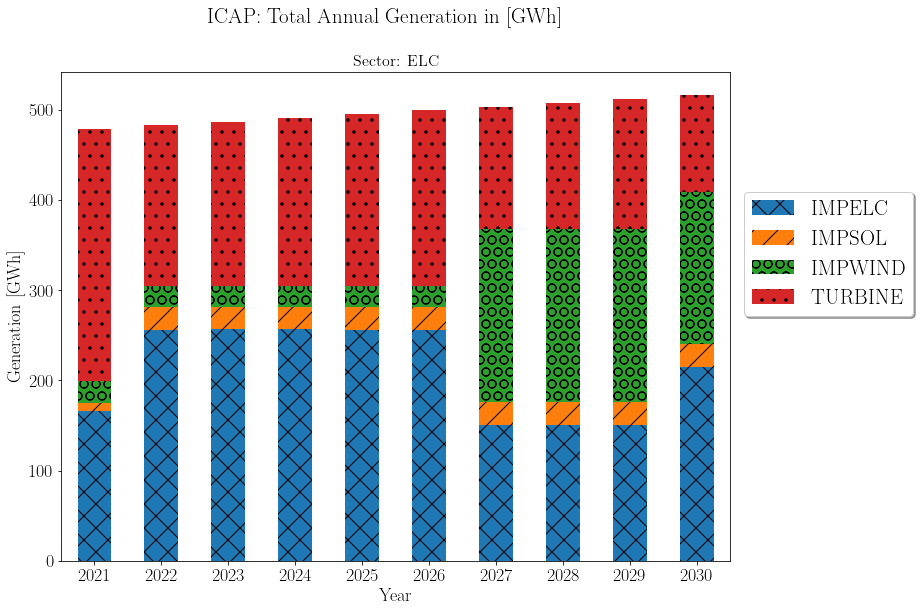

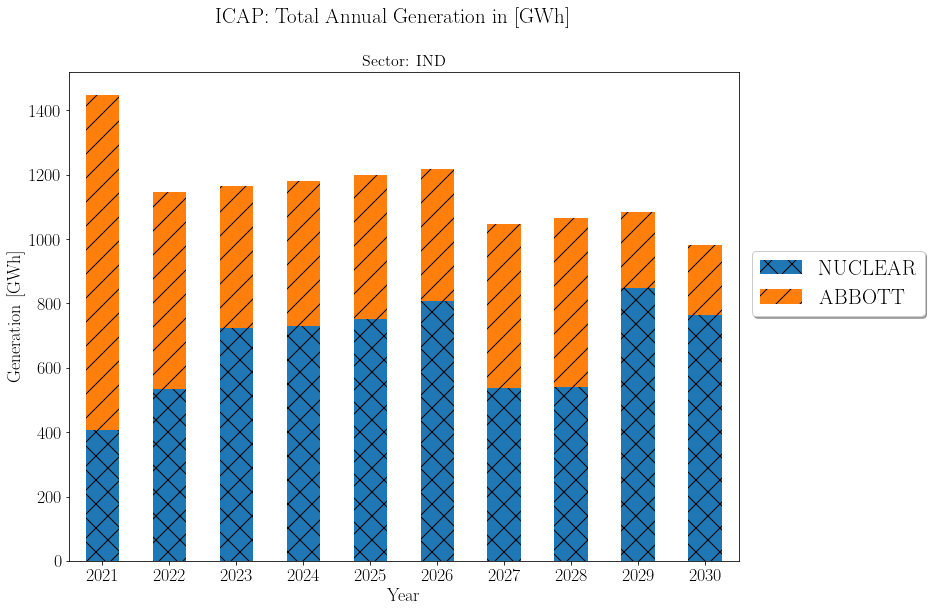

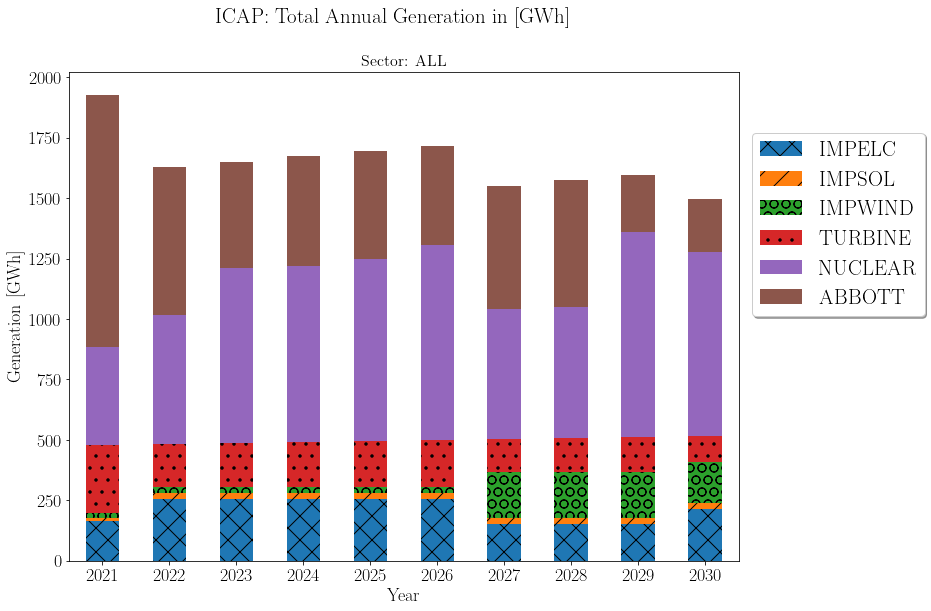

33
45
53
31
49
31
33
45
53
31
49
31


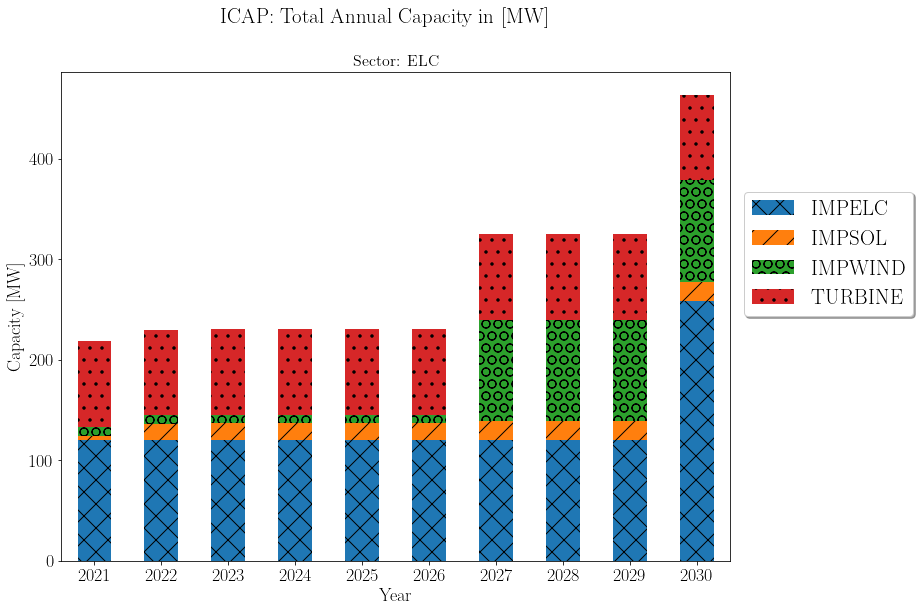

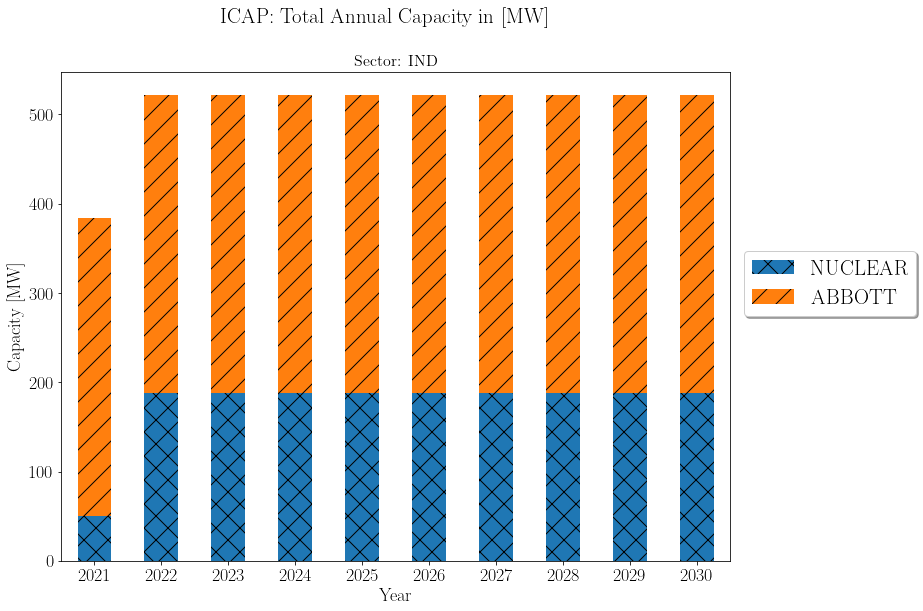

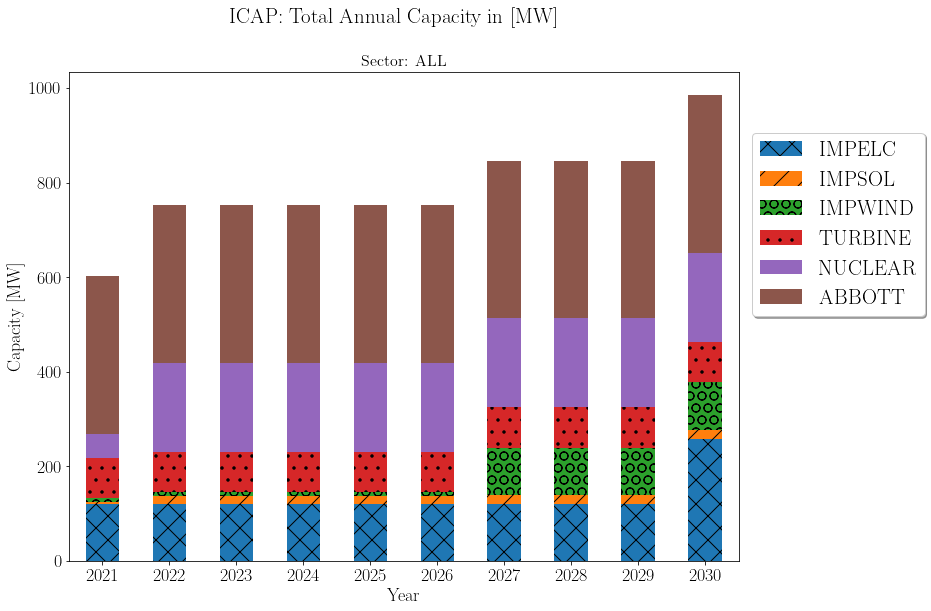

20
0
0
0
0
10
20
0
0
0
0
10


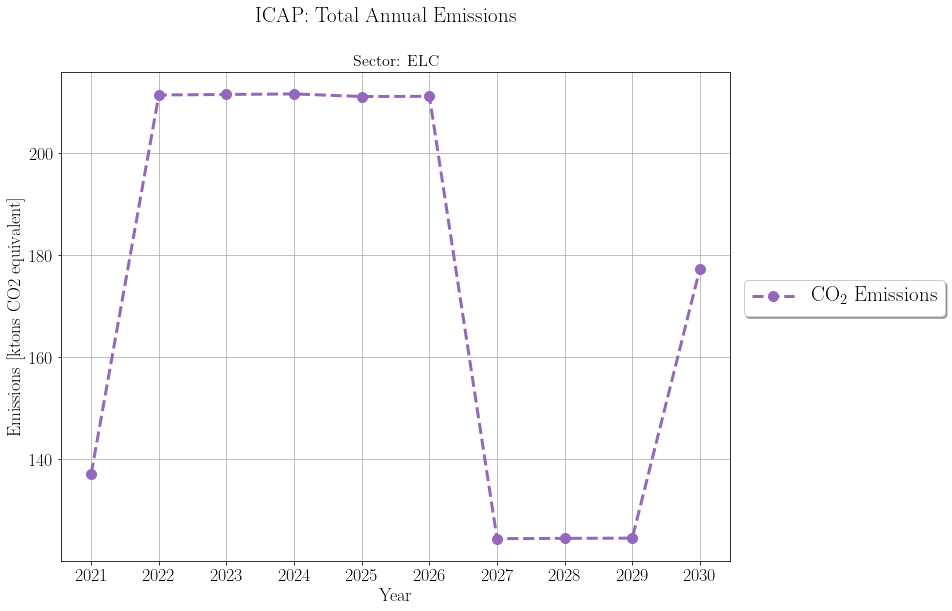

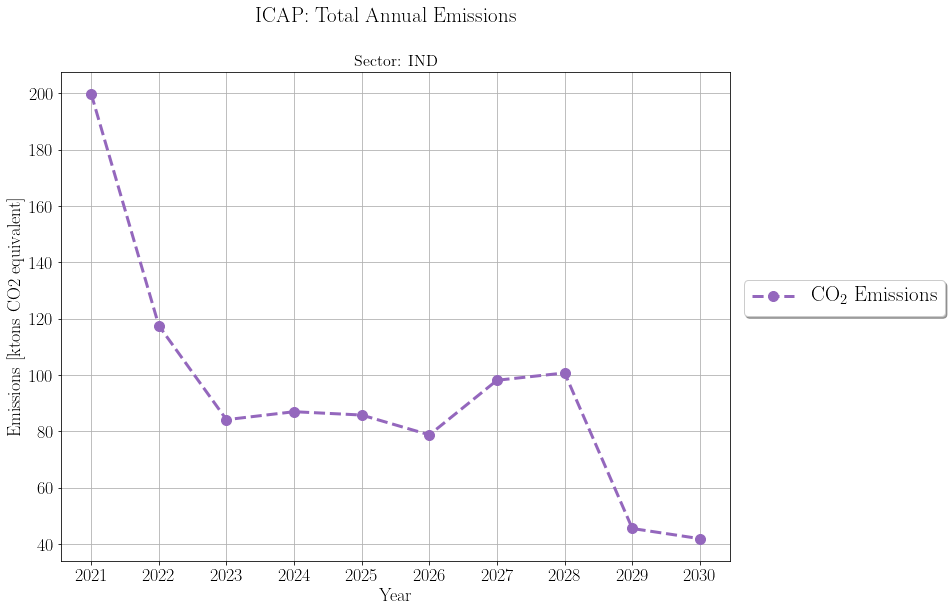

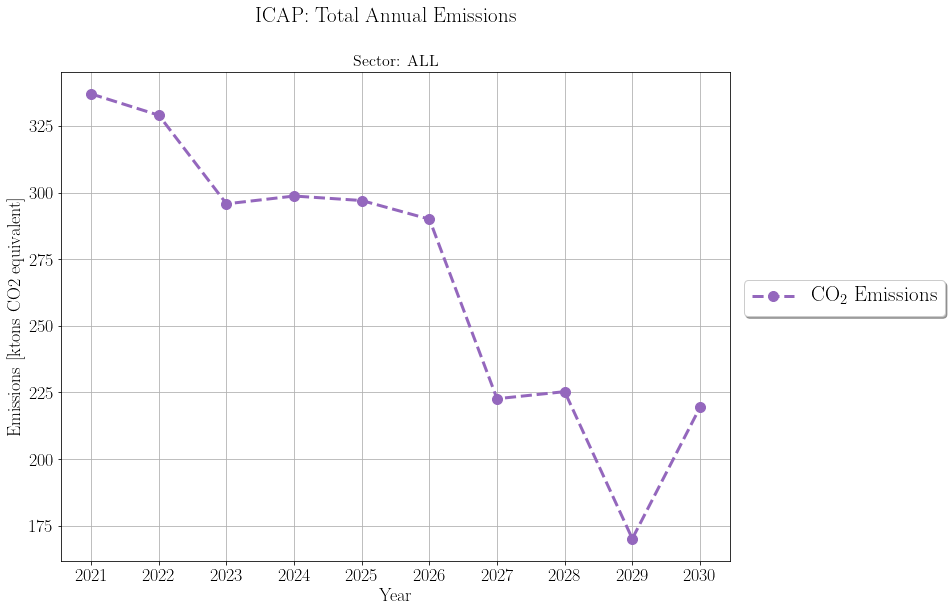

20
27
14
10
19
2
20
27
14
10
19
2


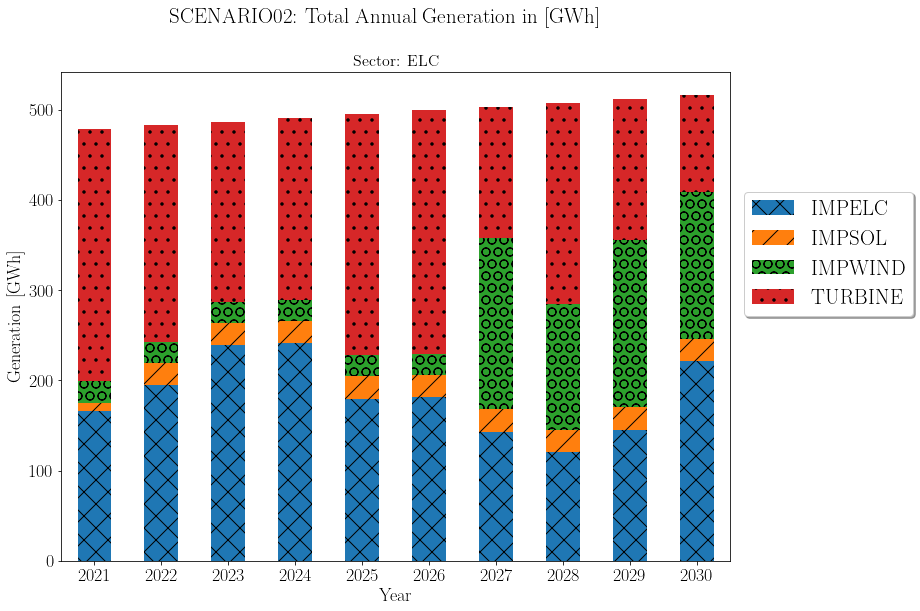

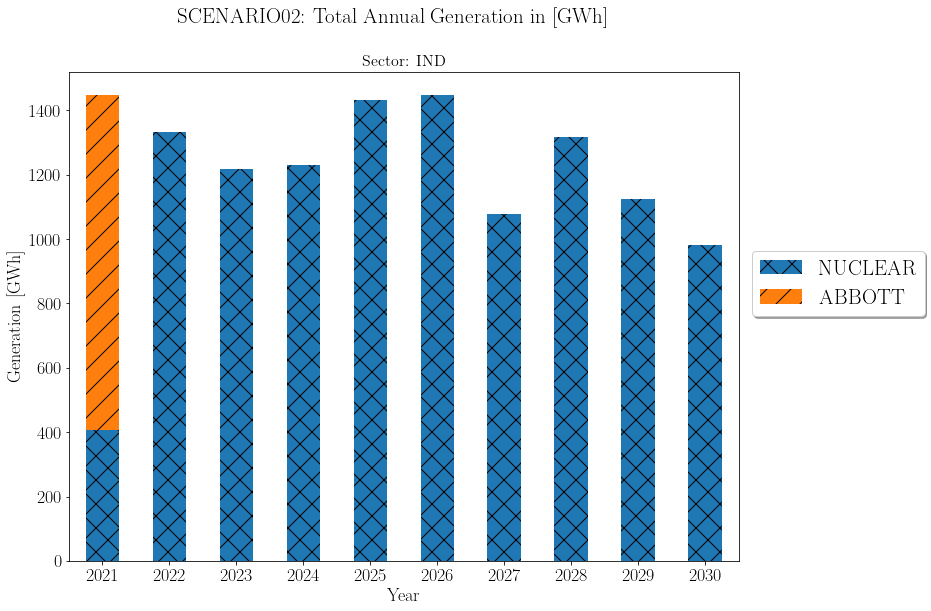

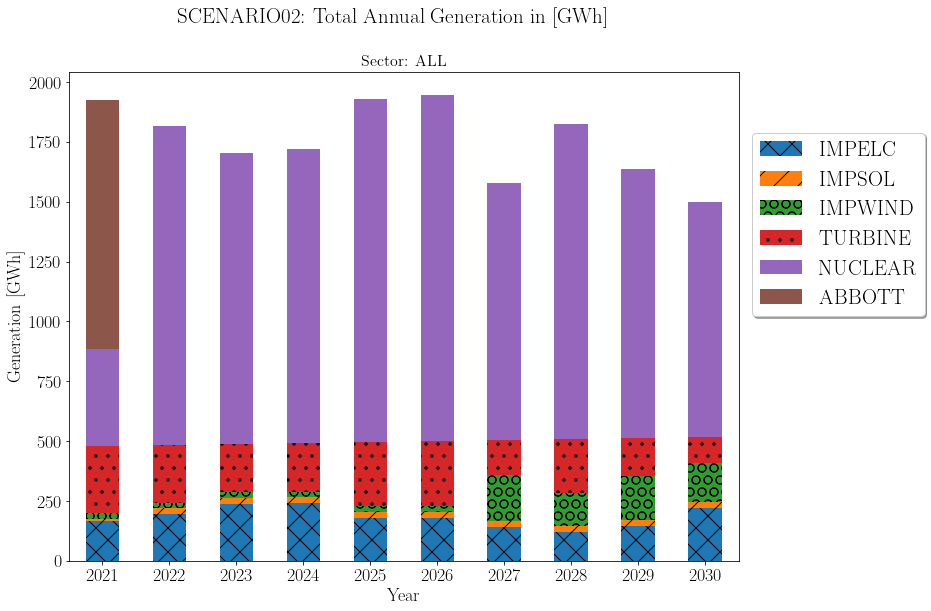

13
13
13
11
17
12
13
13
13
11
17
12


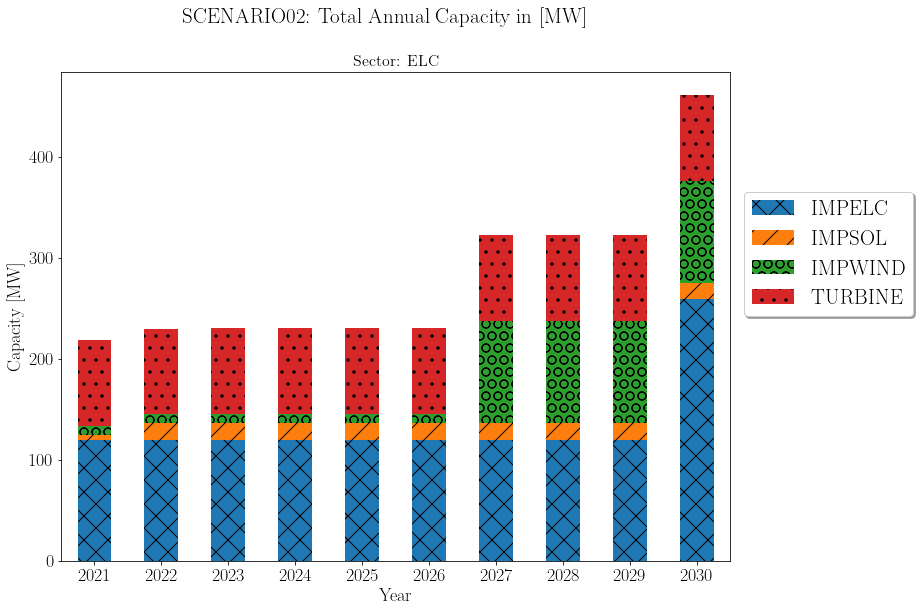

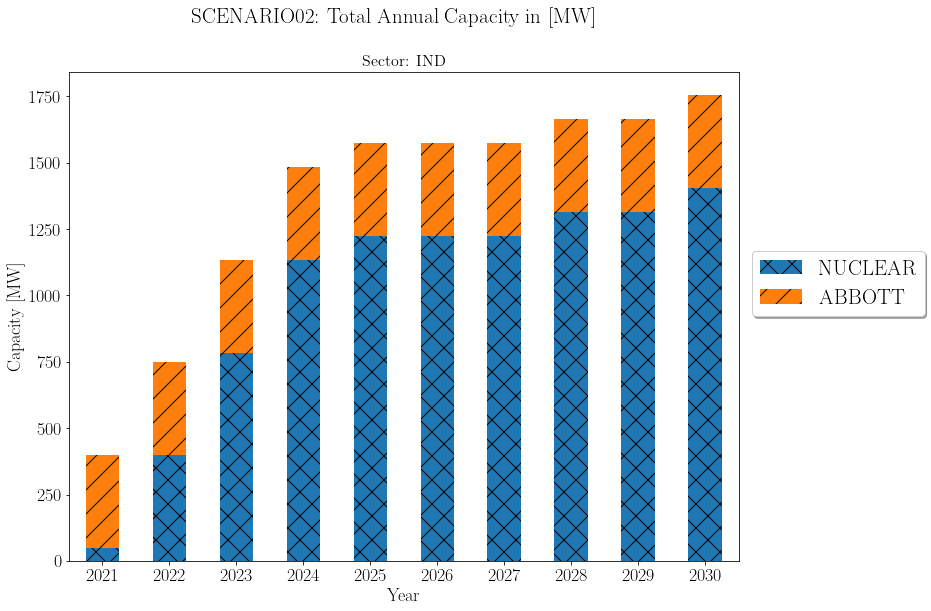

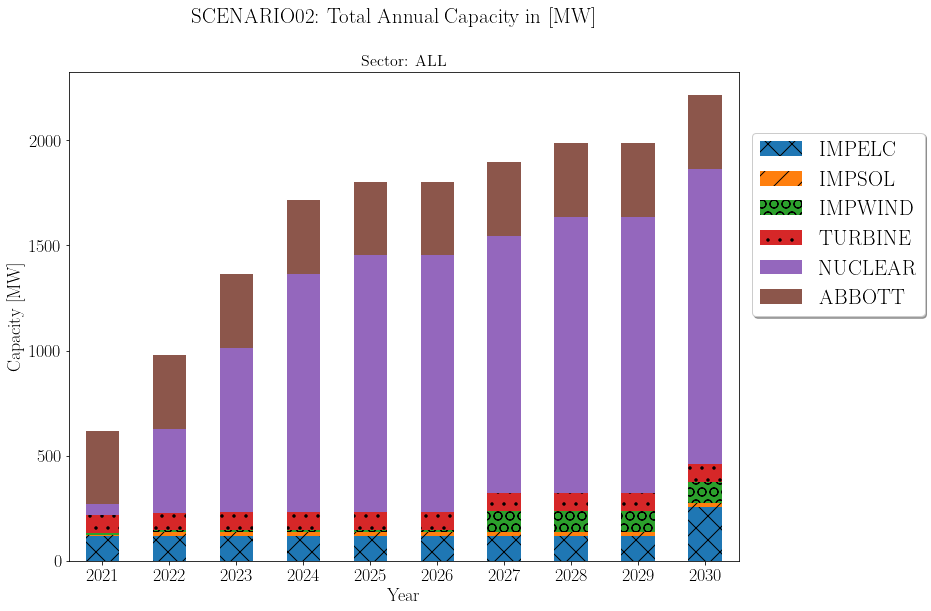

20
0
0
0
0
2
20
0
0
0
0
2


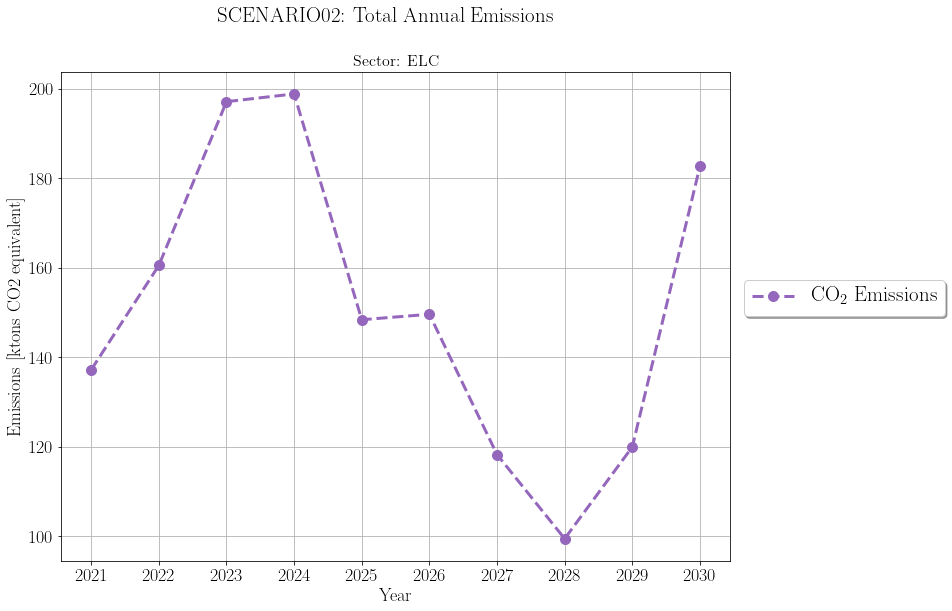

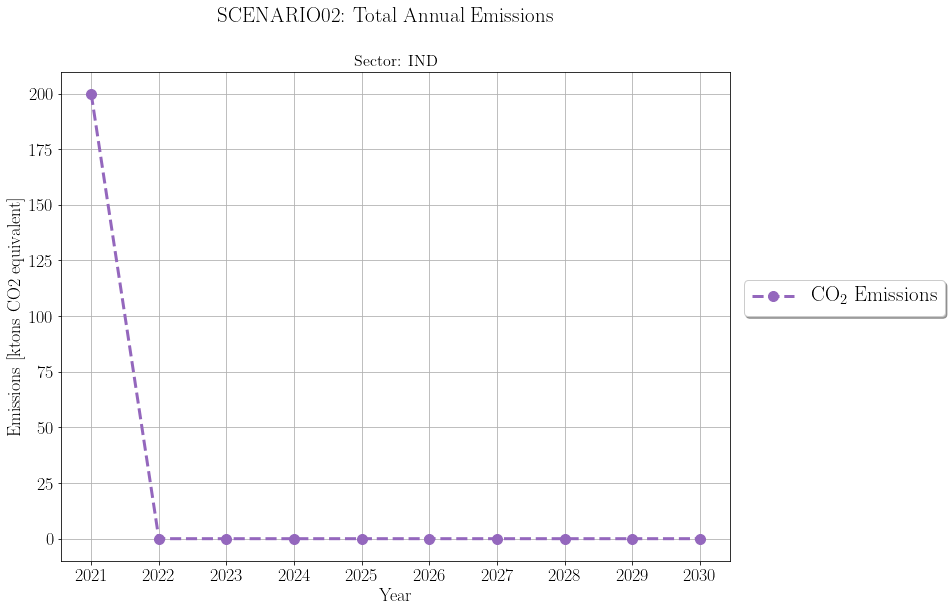

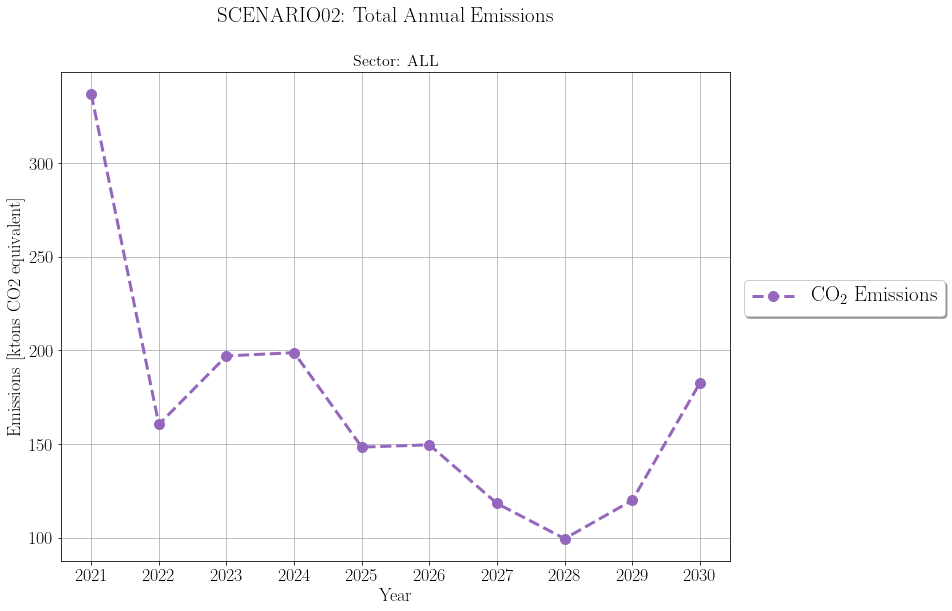

20
25
13
10
0
19
20
25
13
10
0
19


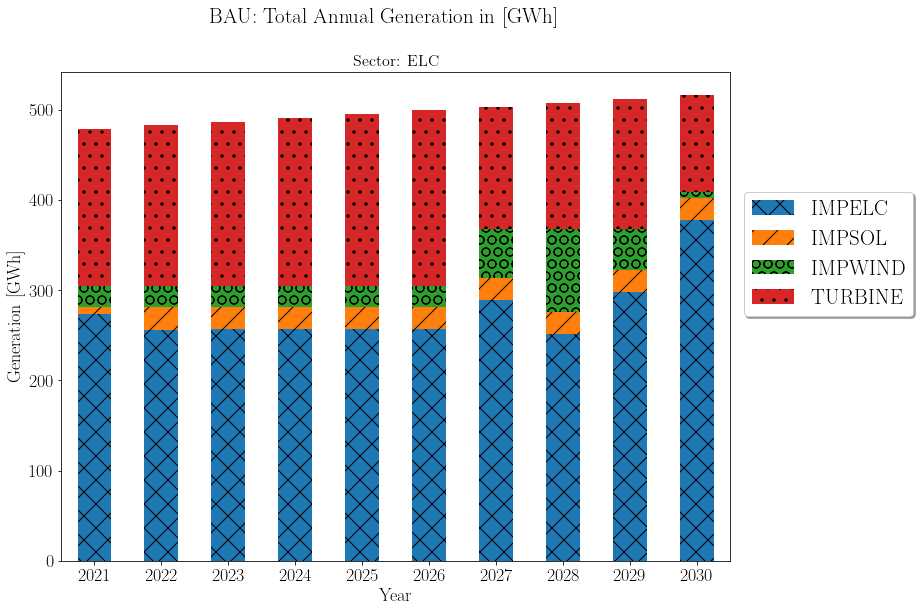

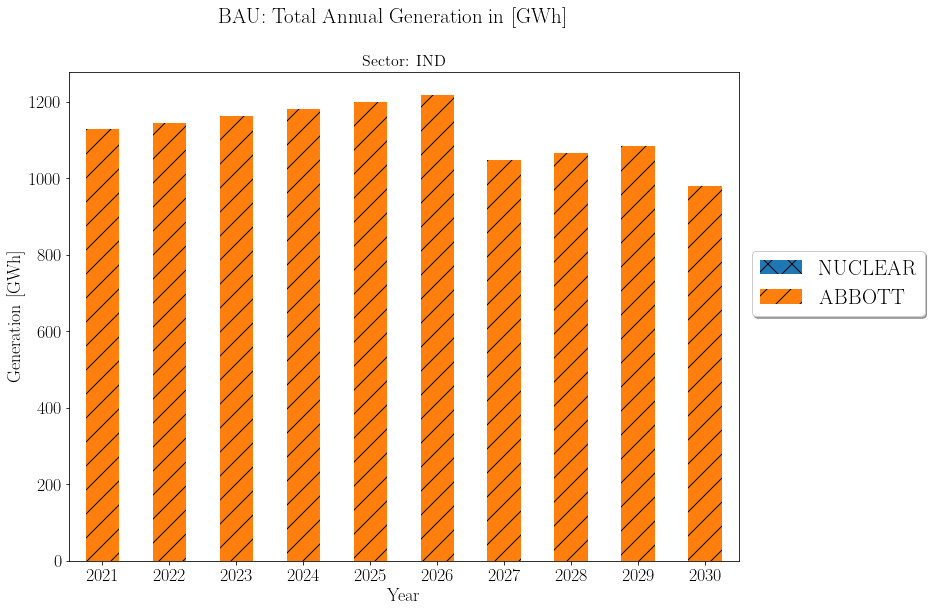

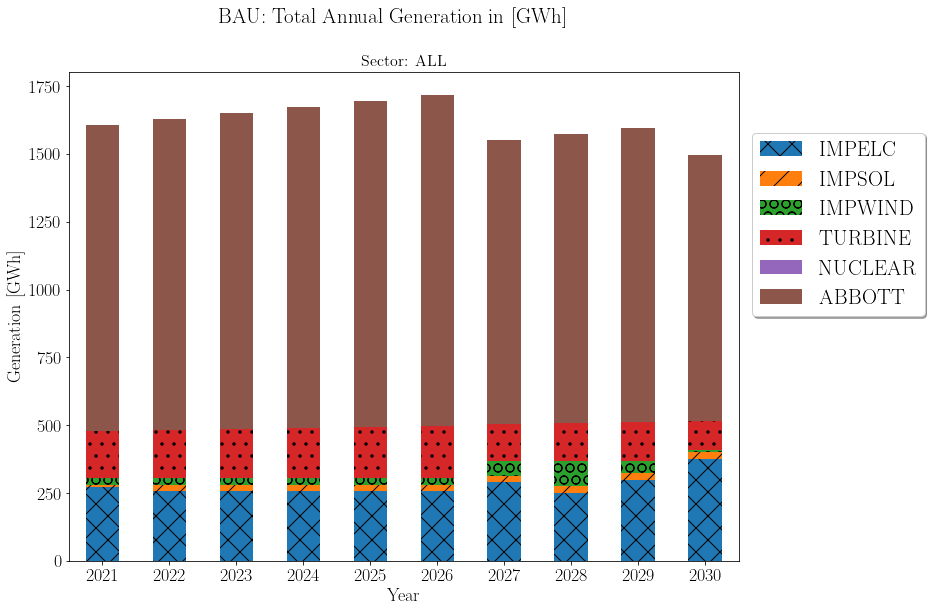

13
13
13
11
0
13
13
13
13
11
0
13


KeyboardInterrupt: 

In [3]:
make_plots(output, False)

### Create BAU Generation Plot with 2014 Reference Year

In [3]:
output

['./data_files/uiuc2050_iCAP_model/iCAP_OutputLog.log',
 './data_files/02_uiuc_scenario02_model/scenario02_OutputLog.log',
 './data_files/bau_uiuc_bau_model/bau_OutputLog.log',
 './data_files/01_uiuc_scenario01_model/scenario01_OutputLog.log',
 './data_files/03_uiuc_scenario03_model/scenario03_OutputLog.log']

In [4]:
import pandas as pd
import numpy as np
from data_parser import get_scenario_name
from data_parser import parse_datalines
from data_parser import variables
from data_parser import create_dataframe
from data_parser import bar_plot

In [5]:
scenario = get_scenario_name(output[1])
datalines = parse_datalines(output[1])
df_elc = create_dataframe(datalines, 'Generation', sector='elc')

length of tech_data: 20
length of tech_data: 27
length of tech_data: 14
length of tech_data: 10


In [6]:
df_elc

,IMPELC,IMPSOL,IMPWIND,TURBINE
Year,,,,
2021,166.284991,9.183742,23.354160,279.87711
2022,194.540002,24.690000,23.350000,240.12000
2023,238.878480,24.690000,23.354160,199.77736
2024,240.976305,24.690000,23.350000,201.78369
2025,179.835268,24.690000,23.350000,267.02473
2026,181.315985,24.690000,23.350000,269.64401
2027,143.334287,24.690000,189.738240,145.43747
2028,120.556057,24.690000,139.761862,222.49208
2029,145.386669,24.690000,185.144514,156.47882


Add data from [iCAP document](https://sustainability.illinois.edu/campus-sustainability/icap/)

In [7]:
yr2014 = pd.Series(data={'IMPELC-2014':199.788, 'TURBINE-2014':275.919}, name=2014)

In [8]:
df_elc2014 = df_elc.append(yr2014, ignore_index=False)

In [9]:
df_elc2014.fillna(0, inplace=True)

In [10]:
df_elc2014.sort_index(inplace=True)

In [11]:
df_elc2014

,IMPELC,IMPSOL,IMPWIND,TURBINE,IMPELC-2014,TURBINE-2014
Year,,,,,,
2014,0.000000,0.000000,0.000000,0.00000,199.788,275.919
2021,166.284991,9.183742,23.354160,279.87711,0.000,0.000
2022,194.540002,24.690000,23.350000,240.12000,0.000,0.000
2023,238.878480,24.690000,23.354160,199.77736,0.000,0.000
2024,240.976305,24.690000,23.350000,201.78369,0.000,0.000
2025,179.835268,24.690000,23.350000,267.02473,0.000,0.000
2026,181.315985,24.690000,23.350000,269.64401,0.000,0.000
2027,143.334287,24.690000,189.738240,145.43747,0.000,0.000
2028,120.556057,24.690000,139.761862,222.49208,0.000,0.000


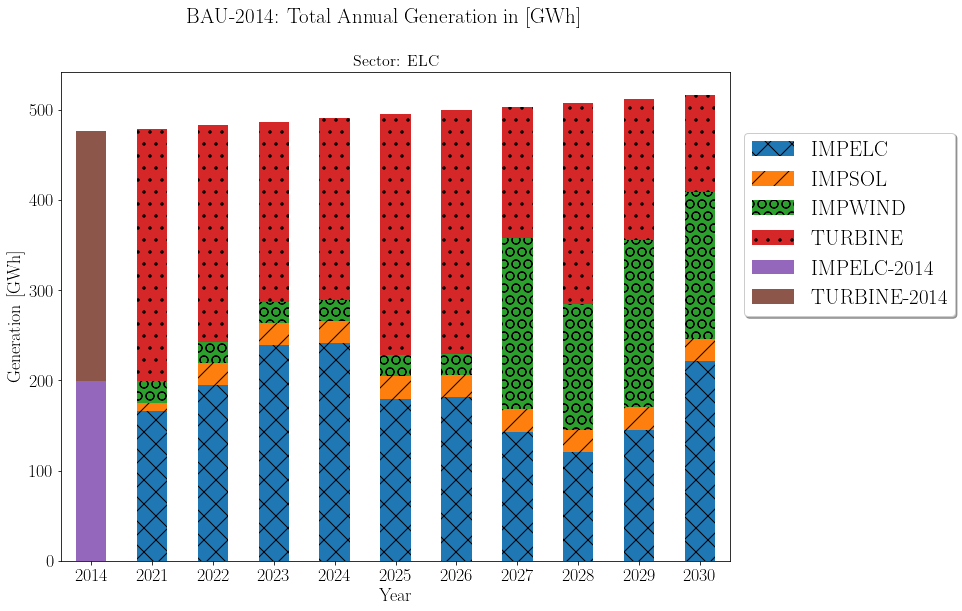

In [12]:
bar_plot(df_elc2014, 'Generation', 'BAU-2014', 'elc', True)
bar_plot(df_elc2014, 'Generation', 'BAU-2014', 'elc', False)

On the command line, execute (from pride/temoa-uiuc): 

```sh
python ~/research/temoa/temoa_model/ --config=data_files/run_mga_scenario02.txt
```

I have not yet figured out the best way to automate this process. My choice of naming convention is challenging Snakemake.

In [13]:
mga_output = get_output_files()
mga_output

['./data_files/uiuc2050_iCAP_model/iCAP_OutputLog.log',
 './data_files/02_uiuc_scenario02_model/scenario02_OutputLog.log',
 './data_files/bau_uiuc_bau_model/bau_OutputLog.log',
 './data_files/01_uiuc_scenario01_model/scenario01_OutputLog.log',
 './data_files/03_uiuc_scenario03_model/scenario03_OutputLog.log']

In [14]:
mga_output = mga_output[5:]
mga_output

[]

In [15]:
make_plots(mga_output, False)

In [16]:
demand = 655.3
growth = 0.01
for y in range(21):
    demand = demand + demand*growth
    print(demand)

661.853
668.4715299999999
675.1562452999999
681.9078077529999
688.7268858305299
695.6141546888352
702.5702962357236
709.5959991980809
716.6919591900618
723.8588787819624
731.097467569782
738.4084422454798
745.7925266679346
753.2504519346139
760.7829564539601
768.3907860184997
776.0746938786847
783.8354408174715
791.6737952256462
799.5905331779027
807.5864385096817


In [17]:
print(247/20)

12.35


In [18]:
y = lambda x: -12.35*x + 247

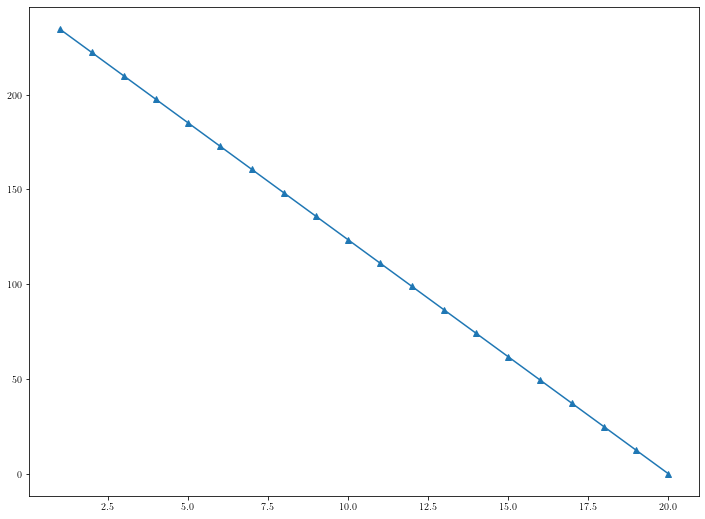

234.65
222.3
209.95
197.6
185.25
172.9
160.55
148.2
135.85000000000002
123.5
111.15
98.80000000000001
86.45000000000002
74.1
61.75
49.400000000000006
37.05000000000001
24.700000000000017
12.349999999999994
0.0


In [19]:
import matplotlib.pyplot as plt
import numpy as np
xt = np.arange(1,21,1)
plt.plot(xt, y(xt), label="co2 decrease", marker='^')
plt.show()

for year in xt:
    print(y(year))

In [35]:
uiuc2050 = get_output_files()
print(uiuc2050)

[]


In [36]:
uiuc2050_folder = uiuc2050[:1]
print(uiuc2050_folder)

[]


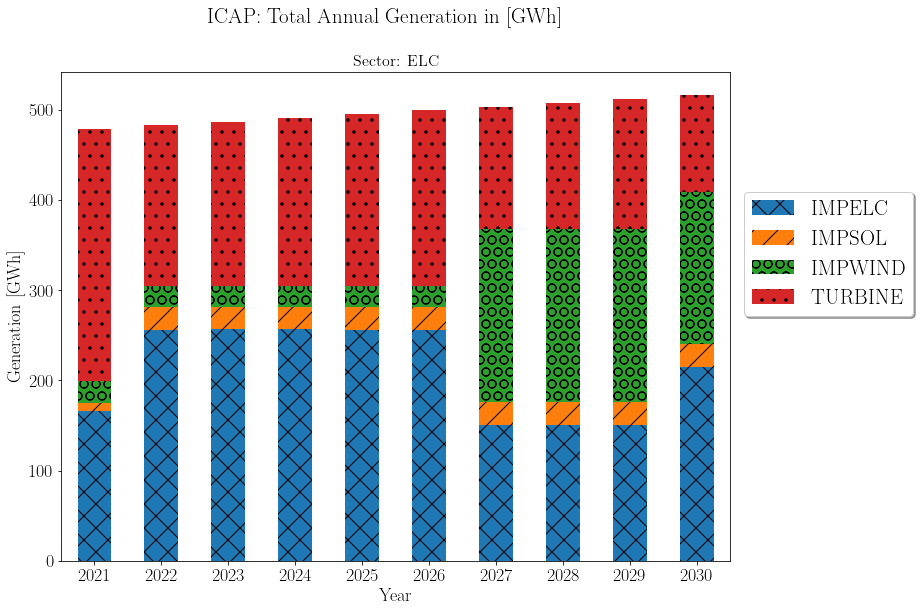

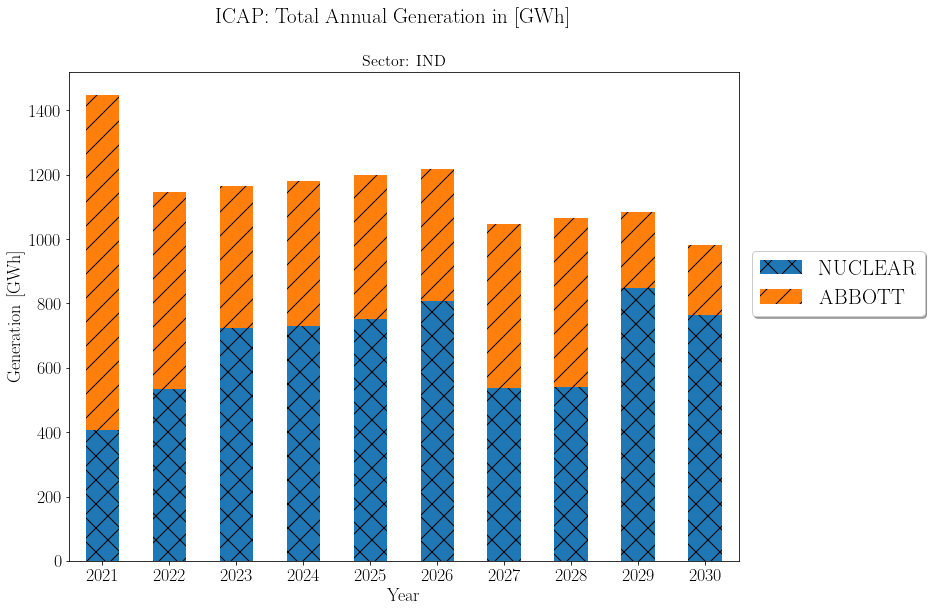

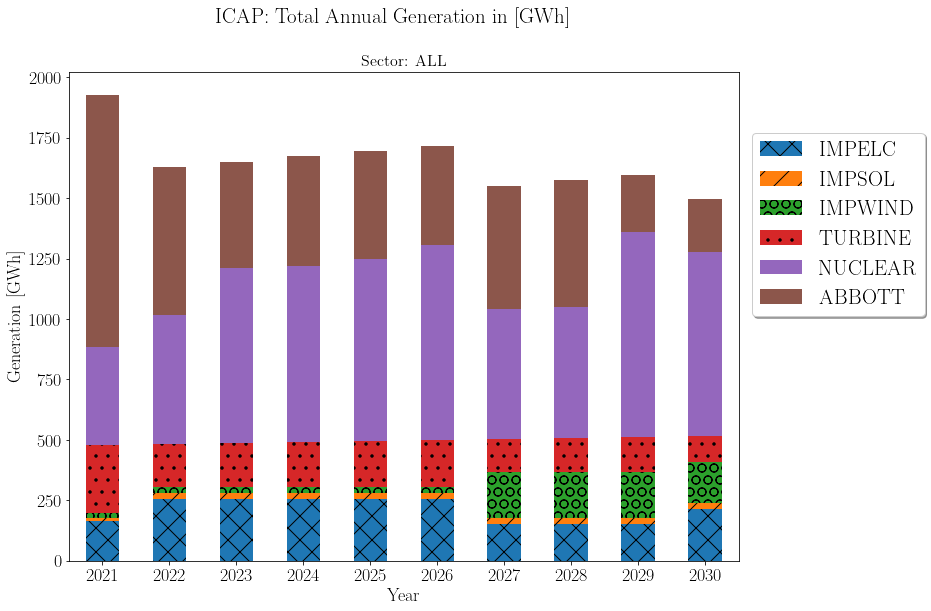

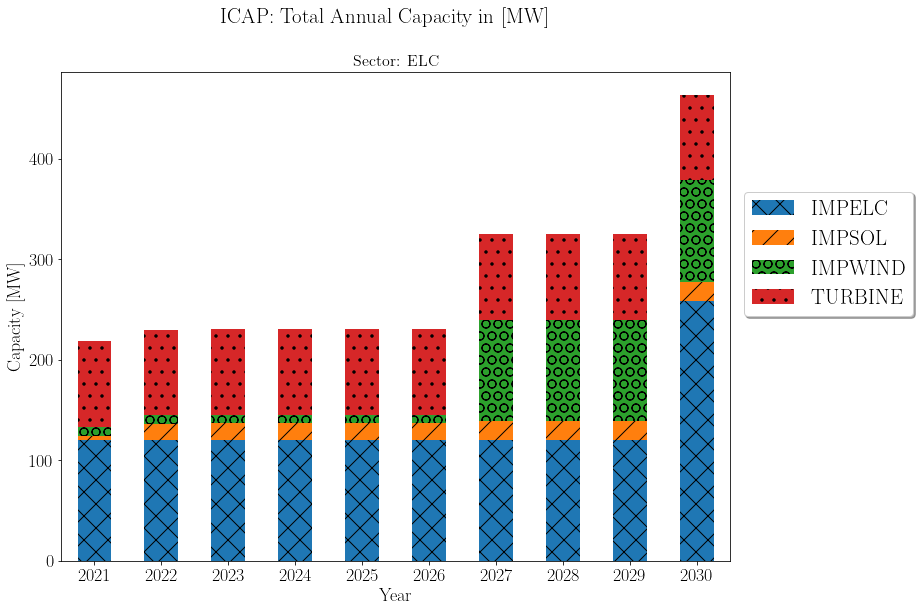

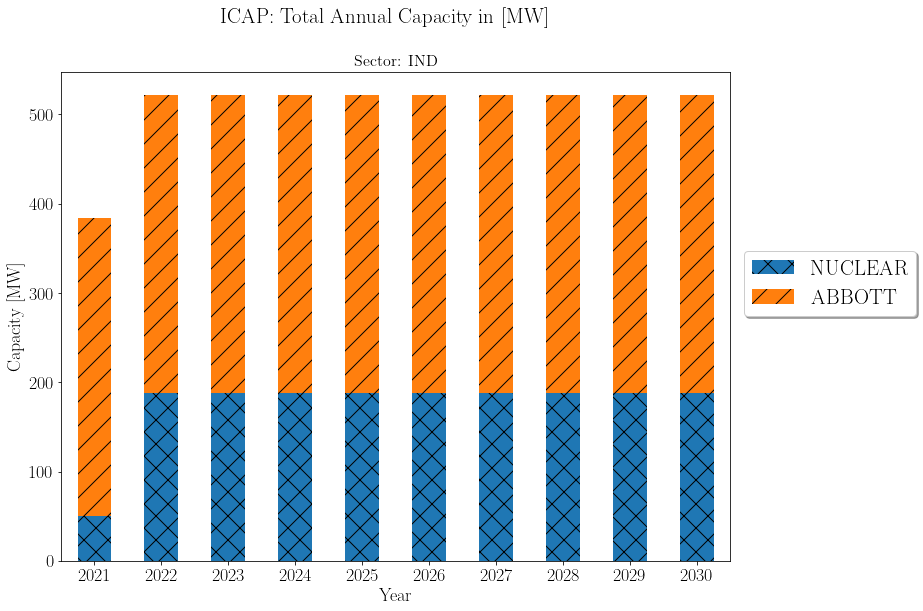

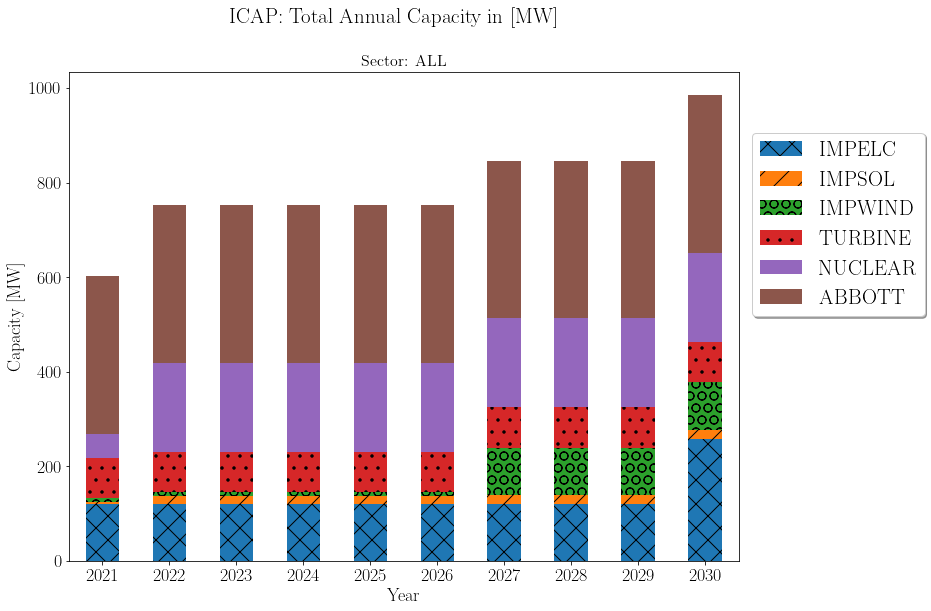

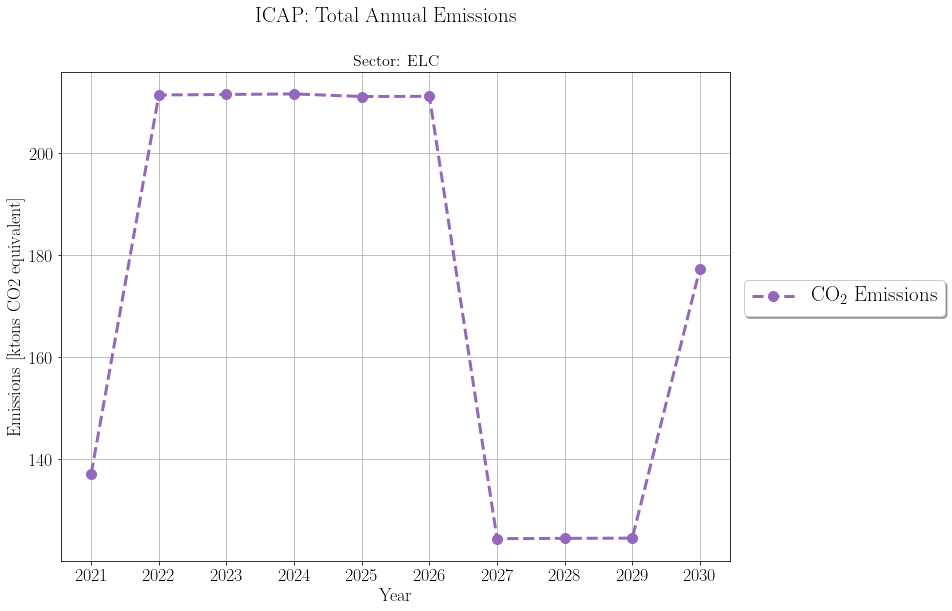

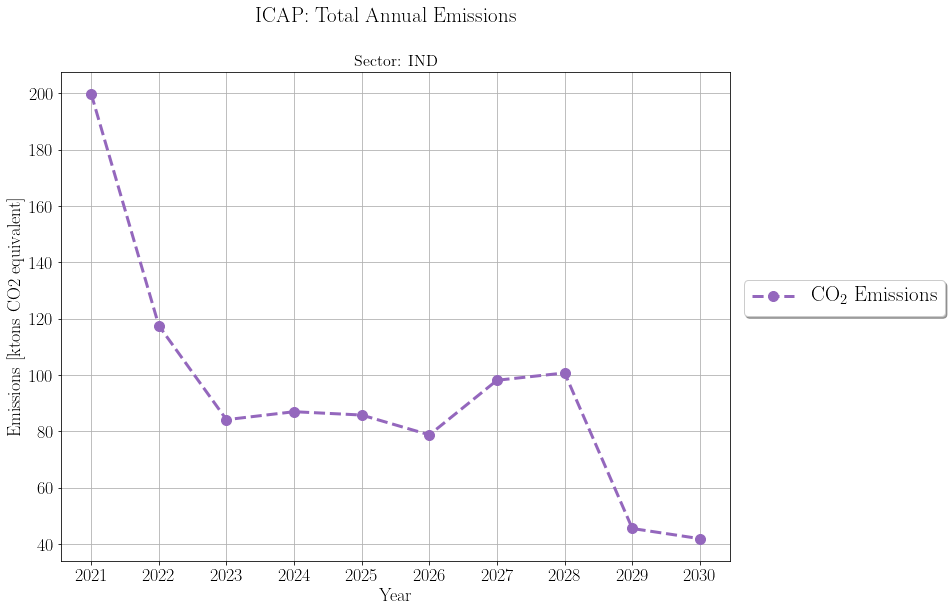

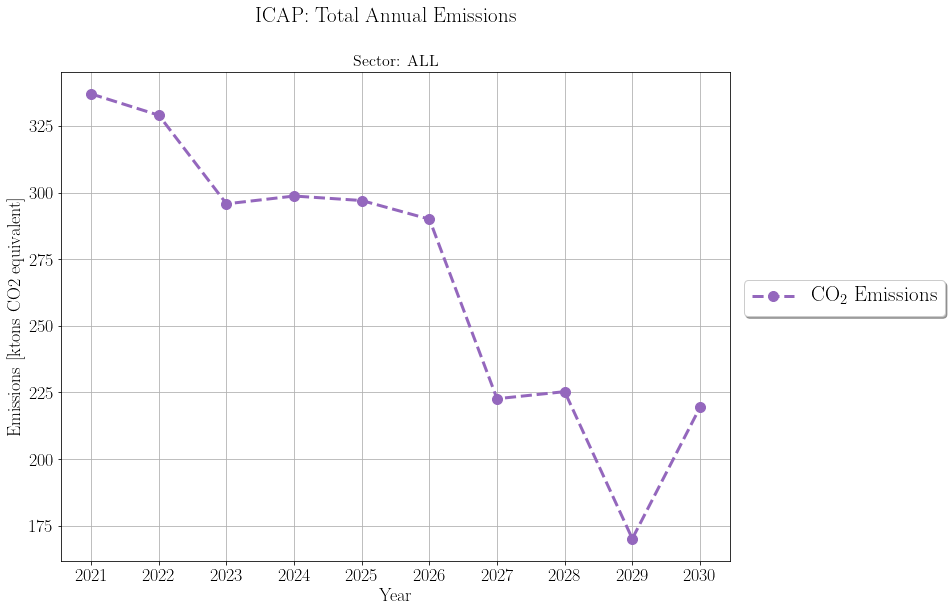

In [36]:
make_plots(uiuc2050_folder, False)

In [30]:
scenario = get_scenario_name(uiuc2050[0])
datalines = parse_datalines(uiuc2050[0])
years = np.arange(2021, 2051, 1)
df_elc = create_dataframe(datalines, 'Generation', sector='elc', years=years)
df_ind = create_dataframe(datalines, 'Generation', sector='elc', years=years)
df_all = create_dataframe(datalines, 'Generation', sector='elc', years=years)

length of tech_data: 20
length of tech_data: 102
length of tech_data: 85
length of tech_data: 30
length of tech_data: 20
length of tech_data: 102
length of tech_data: 85
length of tech_data: 30
length of tech_data: 20
length of tech_data: 102
length of tech_data: 85
length of tech_data: 30


In [31]:
df_elc

,IMPELC,IMPSOL,IMPWIND,TURBINE
Year,,,,
2021,166.284991,9.183742,23.354160,279.87711
2022,256.304938,24.690000,23.350000,178.35507
2023,256.435048,24.690000,23.354160,182.22079
2024,256.564478,24.690000,23.354160,186.19136
2025,255.947578,25.452732,23.354160,190.14553
2026,255.993745,25.522703,23.350000,194.13355
2027,150.849027,24.690000,191.860355,135.80061
2028,150.927007,24.690000,191.951340,139.93165
2029,150.978007,24.690000,192.024925,144.00707


length of tech_data: 20
length of tech_data: 102
length of tech_data: 85
length of tech_data: 30
length of tech_data: 67
length of tech_data: 10
length of tech_data: 20
length of tech_data: 102
length of tech_data: 85
length of tech_data: 30
length of tech_data: 67
length of tech_data: 10


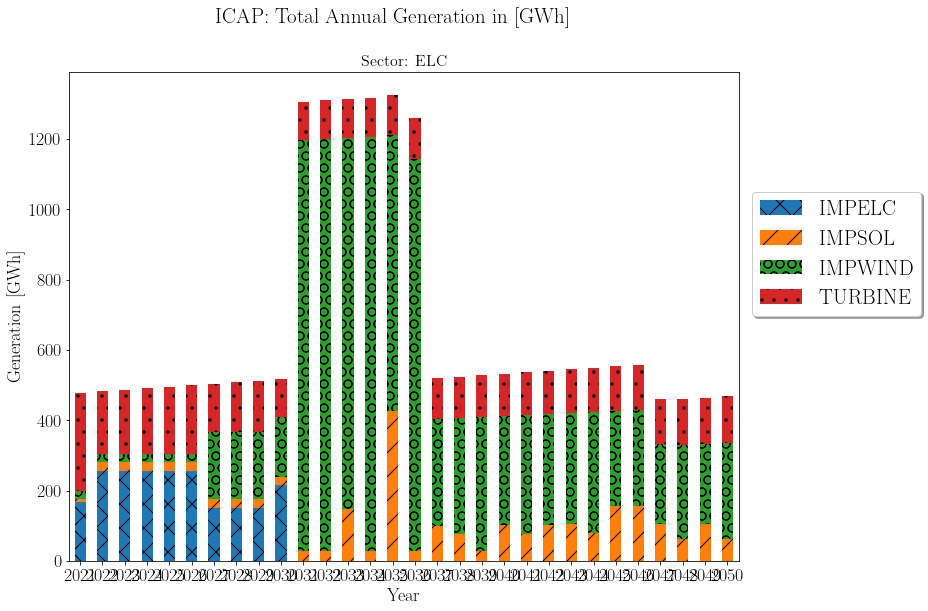

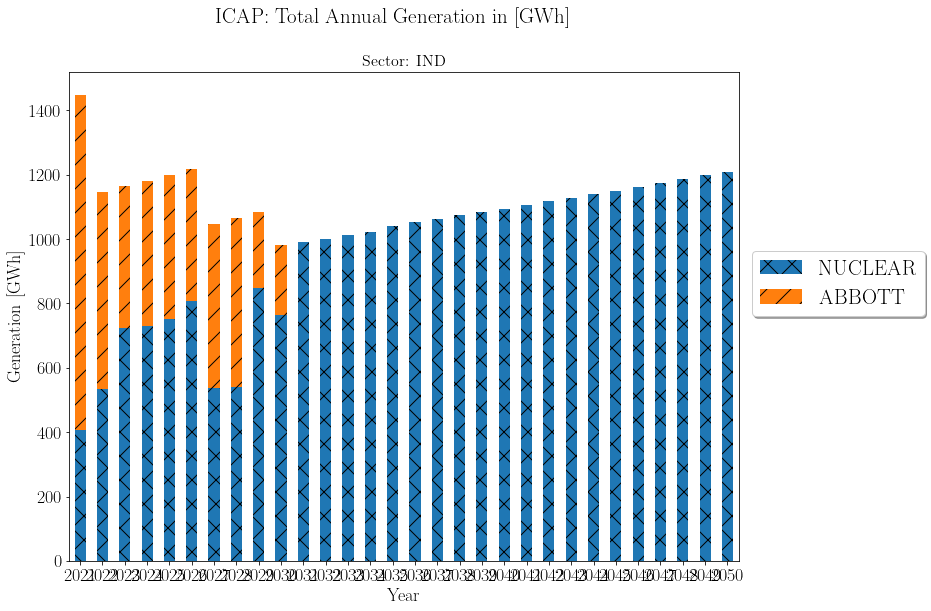

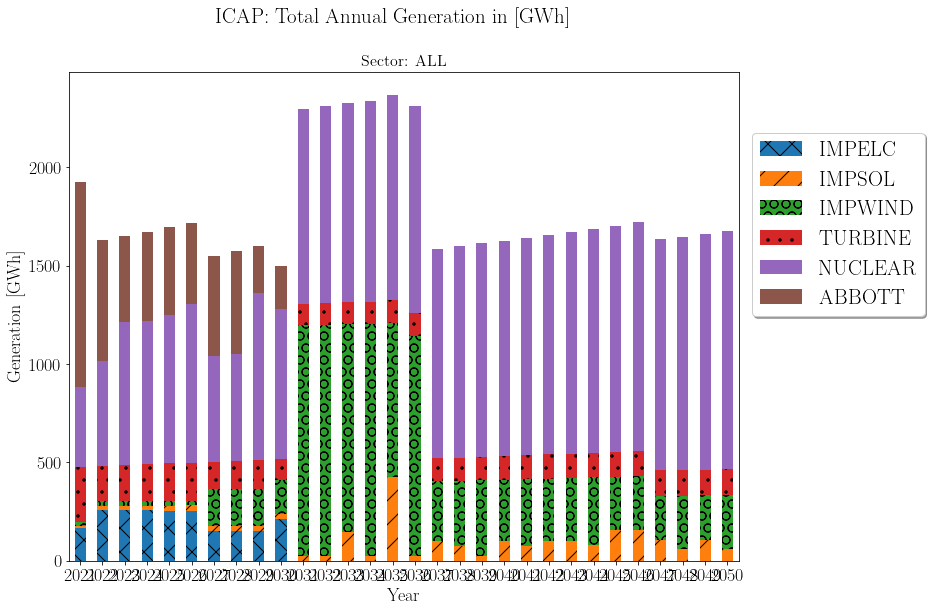

length of tech_data: 33
length of tech_data: 45
length of tech_data: 53
length of tech_data: 31
length of tech_data: 49
length of tech_data: 31
length of tech_data: 33
length of tech_data: 45
length of tech_data: 53
length of tech_data: 31
length of tech_data: 49
length of tech_data: 31


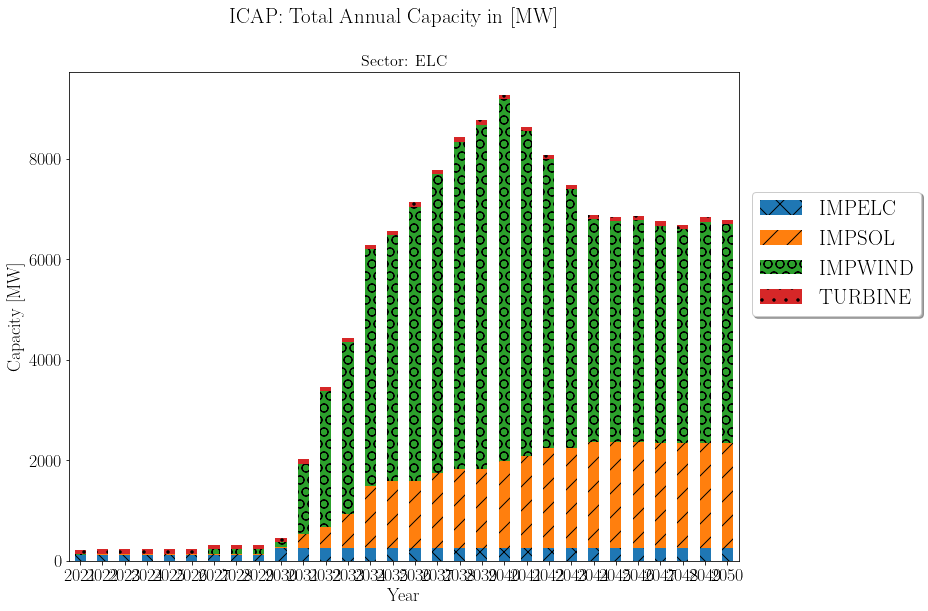

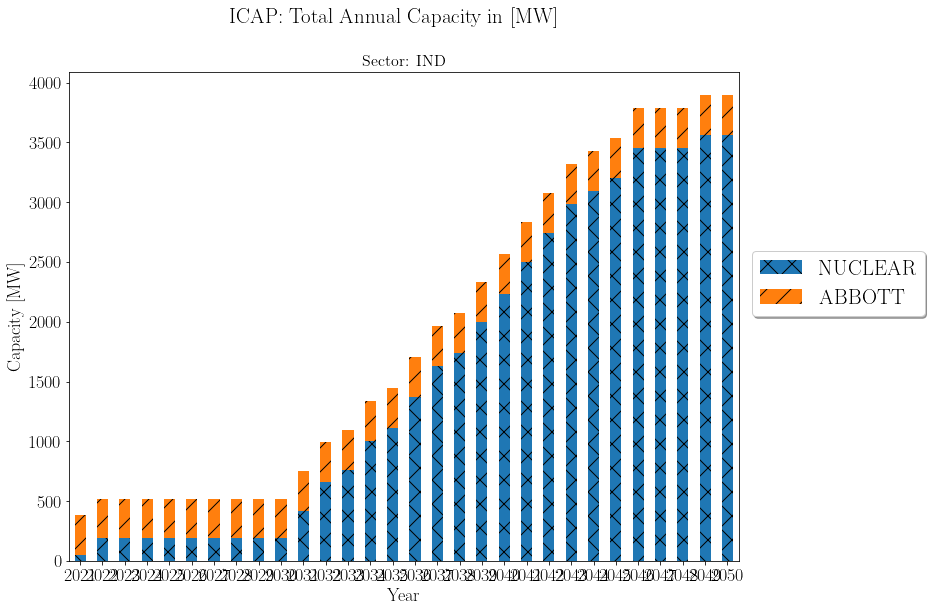

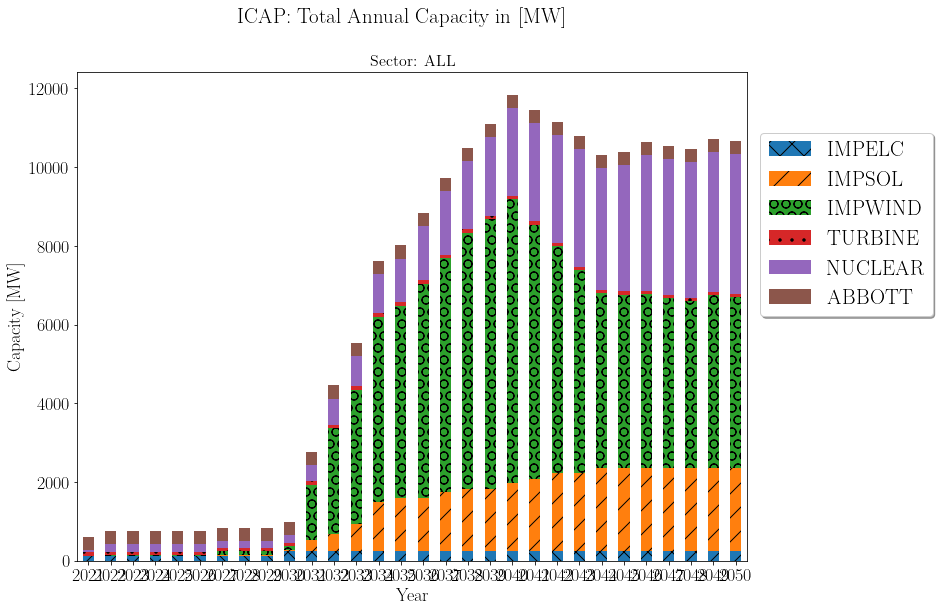

length of tech_data: 20
length of tech_data: 0
length of tech_data: 0
length of tech_data: 0
length of tech_data: 0
length of tech_data: 10
length of tech_data: 20
length of tech_data: 0
length of tech_data: 0
length of tech_data: 0
length of tech_data: 0
length of tech_data: 10


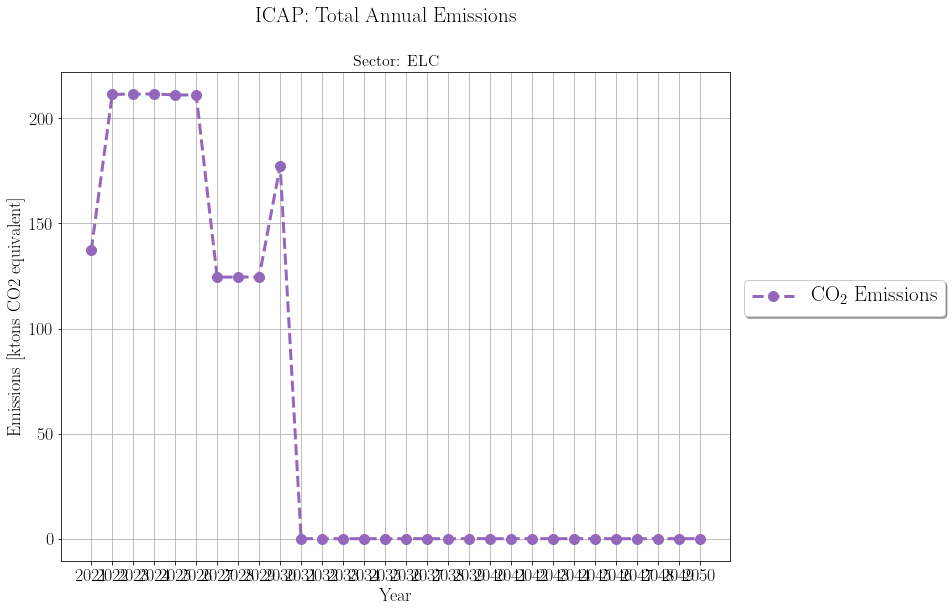

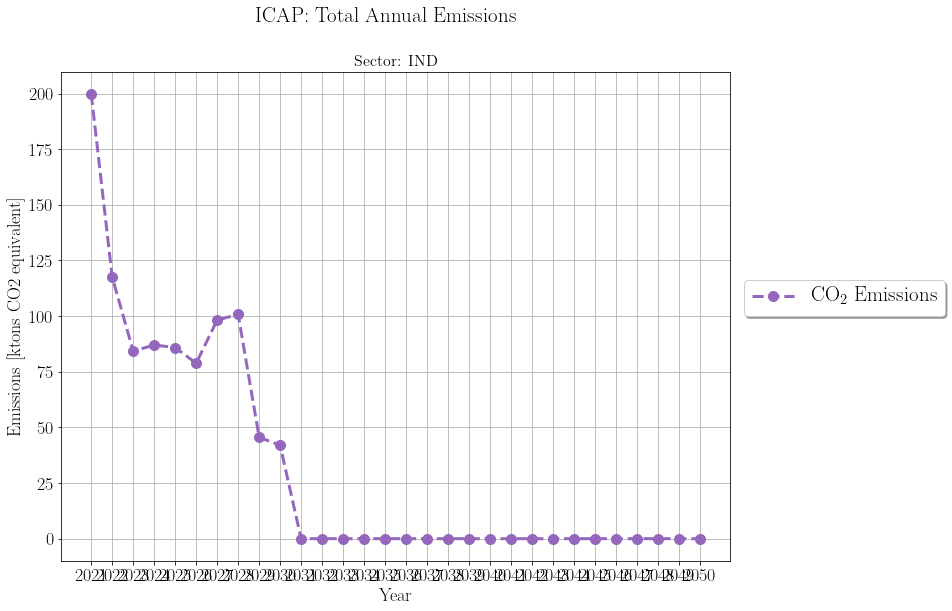

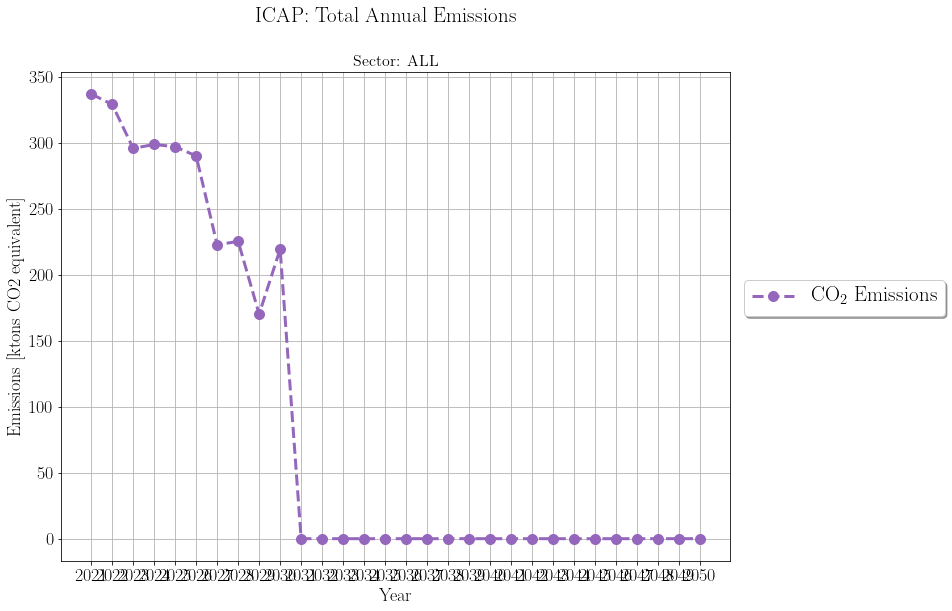

In [32]:
from data_parser import emissions_plot

variables = {'Generation': 'V_ActivityByPeriodAndProcess',
             'Capacity': 'V_Capacity',
             'Emissions': 'V_EmissionActivityByPeriodAndProcess'}
plots_dict = {'Emissions': emissions_plot,
              'Generation': bar_plot,
              'Capacity': bar_plot}

scenario = get_scenario_name(uiuc2050[0])
datalines = parse_datalines(uiuc2050[0])

for var in variables:
            # create dataframes
            df_elc = create_dataframe(datalines, var, sector='elc', years=years)
            df_ind = create_dataframe(datalines, var, sector='ind', years=years)
            df_all = create_dataframe(datalines, var, sector='all', years=years)
            plot = plots_dict[var]
            plot(dataframe=df_elc,
                 variable=var,
                 scenario=scenario,
                 sector='elc',
                 save=False)
            plot(dataframe=df_ind,
                 variable=var,
                 scenario=scenario,
                 sector='ind',
                 save=False)
            plot(dataframe=df_all,
                 variable=var,
                 scenario=scenario,
                 sector='all',
                 save=False)